<a href="https://colab.research.google.com/github/jeehun3020/AI.rtor/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-NN Classifier


No Preprocessing의 평균 정확도:
  k=1: 0.93
  k=3: 0.93
  k=5: 0.96
  k=7: 0.96
  k=9: 0.96
  k=11: 0.98
  k=13: 0.97

StandardScaler의 평균 정확도:
  k=1: 0.94
  k=3: 0.95
  k=5: 0.95
  k=7: 0.95
  k=9: 0.96
  k=11: 0.96
  k=13: 0.96

MinMaxScaler의 평균 정확도:
  k=1: 0.96
  k=3: 0.96
  k=5: 0.96
  k=7: 0.96
  k=9: 0.96
  k=11: 0.96
  k=13: 0.96

RobustScaler의 평균 정확도:
  k=1: 0.91
  k=3: 0.96
  k=5: 0.96
  k=7: 0.96
  k=9: 0.96
  k=11: 0.95
  k=13: 0.96

Normalizer의 평균 정확도:
  k=1: 0.91
  k=3: 0.94
  k=5: 0.93
  k=7: 0.94
  k=9: 0.95
  k=11: 0.95
  k=13: 0.94


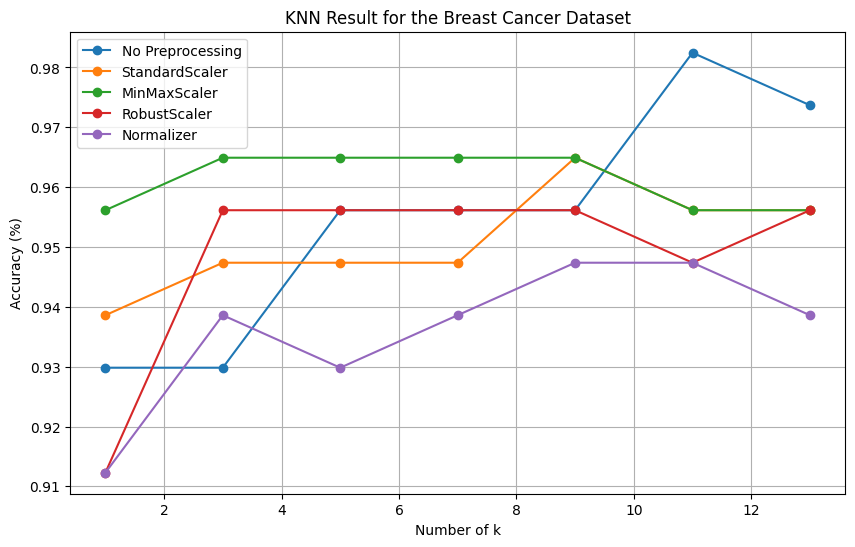

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import numpy as np

# 데이터 로드
bc_data = load_breast_cancer()
X = bc_data.data
y = bc_data.target

# k 값 리스트
k_values = [1, 3, 5, 7, 9, 11, 13]

# 스케일러 리스트
scalers = {
    "No Preprocessing": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "Normalizer": Normalizer()
}

# 30번 반복
num_repeats = 30
results = {scaler_name: {k: [] for k in k_values} for scaler_name in scalers}

for _ in range(num_repeats):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for scaler_name, scaler in scalers.items():
        if scaler:
            # 데이터 스케일링
            scaler.fit(X_train)
            X_train_scaled = scaler.transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            # No Preprocessing
            X_train_scaled = X_train
            X_test_scaled = X_test

        for k in k_values:
            clf = KNeighborsClassifier(n_neighbors=k)
            clf.fit(X_train_scaled, y_train)
            accuracy = clf.score(X_test_scaled, y_test)
            results[scaler_name][k].append(accuracy)

# 각 스케일러와 k 값에 대한 평균 정확도 계산
average_accuracies = {
    scaler_name: {k: np.mean(results[scaler_name][k]) for k in k_values}
    for scaler_name in scalers
}

# 결과 출력
for scaler_name, accuracies in average_accuracies.items():
    print(f"\n{scaler_name}의 평균 정확도:")
    for k, avg_accuracy in accuracies.items():
        print(f"  k={k}: {avg_accuracy:.2f}")

# 그래프
plt.figure(figsize=(10, 6))

for scaler_name, accuracies in average_accuracies.items():
    k_list = list(accuracies.keys())
    accuracy_list = list(accuracies.values())
    plt.plot(k_list, accuracy_list, marker='o', label=scaler_name)

plt.title('KNN Result for the Breast Cancer Dataset')
plt.xlabel('Number of k')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()


K-NN Regression


No Preprocessing의 평균 R^2 스코어:
  k=1: 0.02
  k=3: 0.36
  k=5: 0.43
  k=7: 0.44
  k=9: 0.42
  k=11: 0.43
  k=13: 0.43

Standard의 평균 R^2 스코어:
  k=1: 0.07
  k=3: 0.38
  k=5: 0.42
  k=7: 0.44
  k=9: 0.42
  k=11: 0.42
  k=13: 0.41

MinMax의 평균 R^2 스코어:
  k=1: 0.06
  k=3: 0.38
  k=5: 0.45
  k=7: 0.44
  k=9: 0.44
  k=11: 0.40
  k=13: 0.40

Robust의 평균 R^2 스코어:
  k=1: 0.03
  k=3: 0.36
  k=5: 0.43
  k=7: 0.46
  k=9: 0.41
  k=11: 0.41
  k=13: 0.42

Normalizer의 평균 R^2 스코어:
  k=1: 0.14
  k=3: 0.38
  k=5: 0.39
  k=7: 0.42
  k=9: 0.44
  k=11: 0.46
  k=13: 0.45


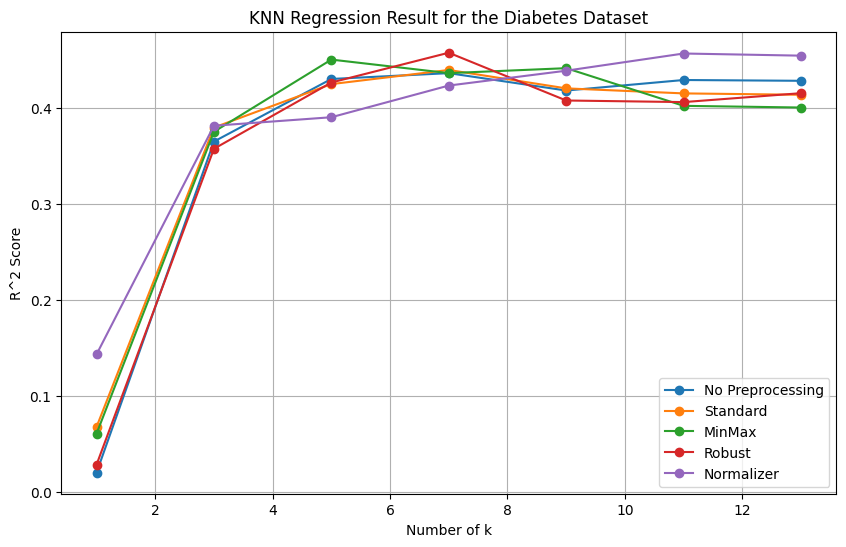

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import numpy as np

# 데이터 로드
data = load_diabetes()
X = data.data
y = data.target

# k 값 리스트
k_vals = [1, 3, 5, 7, 9, 11, 13]

# 스케일러 리스트 (No Preprocessing 포함)
scalers = {
    "No Preprocessing": None,
    "Standard": StandardScaler(),
    "MinMax": MinMaxScaler(),
    "Robust": RobustScaler(),
    "Normalizer": Normalizer()
}

# 30번 반복
num_repeats = 30
results = {scaler_name: {k: [] for k in k_vals} for scaler_name in scalers}

for _ in range(num_repeats):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for scaler_name, scaler in scalers.items():
        if scaler:
            # 데이터 스케일링
            scaler.fit(X_train)
            X_train_scaled = scaler.transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            # No Preprocessing
            X_train_scaled = X_train
            X_test_scaled = X_test

        for k in k_vals:
            reg = KNeighborsRegressor(n_neighbors=k)
            reg.fit(X_train_scaled, y_train)
            r2_score = reg.score(X_test_scaled, y_test)
            results[scaler_name][k].append(r2_score)

# 각 스케일러와 k 값에 대한 평균 R^2 스코어 계산
avg_r2_scores = {
    scaler_name: {k: np.mean(results[scaler_name][k]) for k in k_vals}
    for scaler_name in scalers
}

# 결과 출력
for scaler_name, r2_scores in avg_r2_scores.items():
    print(f"\n{scaler_name}의 평균 R^2 스코어:")
    for k, avg_r2_score in r2_scores.items():
        print(f"  k={k}: {avg_r2_score:.2f}")

# 그래프 그리기
plt.figure(figsize=(10, 6))

for scaler_name, r2_scores in avg_r2_scores.items():
    k_list = list(r2_scores.keys())
    r2_score_list = list(r2_scores.values())
    plt.plot(k_list, r2_score_list, marker='o', label=scaler_name)

plt.title('KNN Regression Result for the Diabetes Dataset')
plt.xlabel('Number of k')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid(True)
plt.show()